In [34]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def get_data_from_worldometer():
  html_from_worldometer = requests.get('https://www.worldometers.info/coronavirus/').text
  soup = BeautifulSoup(html_from_worldometer, 'html.parser')

  all_rows = soup.find(id="main_table_countries_today").find('tbody').findAll('tr', class_ = None)
  labels_row = soup.find('thead').find('tr')

  original_labels = [l.getText() for l in labels_row.find_all('th')]
  labels_replacement = {
    '#': 'rank',
    'Country,Other': 'country',
    'TotalCases' : 'total_cases',
    'NewCases': 'new_cases',
    'TotalDeaths': 'total_deaths',
    'NewDeaths': 'new_deaths',
    'TotalRecovered': 'total_recovered',
    'NewRecovered': 'new_recovered',
    'ActiveCases': 'active_cases',
    'Serious,Critical': 'serious_or_critical',
    'Tot\xa0Cases/1M pop': 'cases_per_mil_pop',
    'Deaths/1M pop': 'deaths_per_mil_pop',
    'TotalTests': 'total_tests',
    'Tests/\n1M pop\n': 'tests_per_mil_pop',
    'Population': 'population',
    'Continent': 'continent',
    '1 Caseevery X ppl': 'case_per_x_pop',
    '1 Deathevery X ppl': 'death_per_x_pop',
    '1 Testevery X ppl': 'text_per_x_pop',
    'New Cases/1M pop':	'new_cases_per_mil_pop',
    'New Deaths/1M pop': 'new_deaths_per_mil_pop',
    'Active Cases/1M pop': 'active_cases_per_mil_pop'
  }
  labels = [labels_replacement[l] for l in original_labels]

  content_as_list_of_list = [[c.get_text() for c in row.find_all('td')] for row in all_rows]

  df = pd.DataFrame(content_as_list_of_list, columns=labels)
  return df

In [15]:
data = get_data_from_worldometer()
data.head()

,rank,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_or_critical,...,total_tests,tests_per_mil_pop,population,continent,case_per_x_pop,death_per_x_pop,text_per_x_pop,new_cases_per_mil_pop,new_deaths_per_mil_pop,active_cases_per_mil_pop
0,1,USA,"34,228,520","+1,283","612,761",+60,"28,179,493","+1,834","5,436,266","5,199",...,"489,780,844","1,471,642","332,812,597",North America,10,543,1,4,0.2,"16,334"
1,2,India,"29,077,966","+81,017","353,246","+1,902","27,479,472","+142,673","1,245,248","8,944",...,"368,207,596","264,395","1,392,642,289",Asia,48,"3,942",4,58,1,894
2,3,Brazil,"16,985,812",,"474,614",,"15,408,401",,"1,102,797","8,318",...,"50,028,915","233,815","213,967,902",South America,13,451,4,,,"5,154"
3,4,France,"5,713,917",,"110,062",,"5,425,197",,"178,658","2,472",...,"87,363,010","1,335,656","65,408,321",Europe,11,594,1,,,"2,731"
4,5,Turkey,"5,300,236","+6,609","48,341",+86,"5,173,186","+5,836","78,709","1,044",...,"55,899,143","656,215","85,184,183",Asia,16,"1,762",2,78,1,924


In [16]:
def clean_df(df):
  useful_columns = ['country', 'total_cases', 'total_deaths', 'population', 'total_tests', 'continent']
  numerical_columns = ['total_cases', 'total_deaths', 'population', 'total_tests']
  for nc in numerical_columns:
    df[nc] = df[nc].str.replace('(\+|\s|,)', '', regex=True).str.replace('^$', '0').astype('int64')
  return df

In [19]:
df = clean_df(data)
df.head()

<ipython-input-16-e90b3dcd2b97>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[nc] = df[nc].str.replace('(\+|\s|,)', '', regex=True).str.replace('^$', '0').astype('int64')


,rank,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_or_critical,...,total_tests,tests_per_mil_pop,population,continent,case_per_x_pop,death_per_x_pop,text_per_x_pop,new_cases_per_mil_pop,new_deaths_per_mil_pop,active_cases_per_mil_pop
0,1,USA,34228520,"+1,283",612761,+60,"28,179,493","+1,834","5,436,266","5,199",...,489780844,"1,471,642",332812597,North America,10,543,1,4,0.2,"16,334"
1,2,India,29077966,"+81,017",353246,"+1,902","27,479,472","+142,673","1,245,248","8,944",...,368207596,"264,395",1392642289,Asia,48,"3,942",4,58,1,894
2,3,Brazil,16985812,,474614,,"15,408,401",,"1,102,797","8,318",...,50028915,"233,815",213967902,South America,13,451,4,,,"5,154"
3,4,France,5713917,,110062,,"5,425,197",,"178,658","2,472",...,87363010,"1,335,656",65408321,Europe,11,594,1,,,"2,731"
4,5,Turkey,5300236,"+6,609",48341,+86,"5,173,186","+5,836","78,709","1,044",...,55899143,"656,215",85184183,Asia,16,"1,762",2,78,1,924


# How is deaths per case? Which countries/regions have the most deaths per case and the least deaths per case?

In [28]:
df['deaths_per_case'] = df['total_deaths'] / df['total_cases']
df[df['total_cases'] > 10000][['country', 'total_cases', 'deaths_per_case']].sort_values('deaths_per_case')

,country,total_cases,deaths_per_case
105,Singapore,62219,0.000546
75,Qatar,218980,0.002603
103,Maldives,68502,0.002759
40,UAE,587244,0.002902
145,Seychelles,12466,0.003690
...,...,...,...
65,Egypt,268754,0.057298
126,Syria,24680,0.072771
114,Sudan,36004,0.074908
14,Mexico,2434562,0.093996


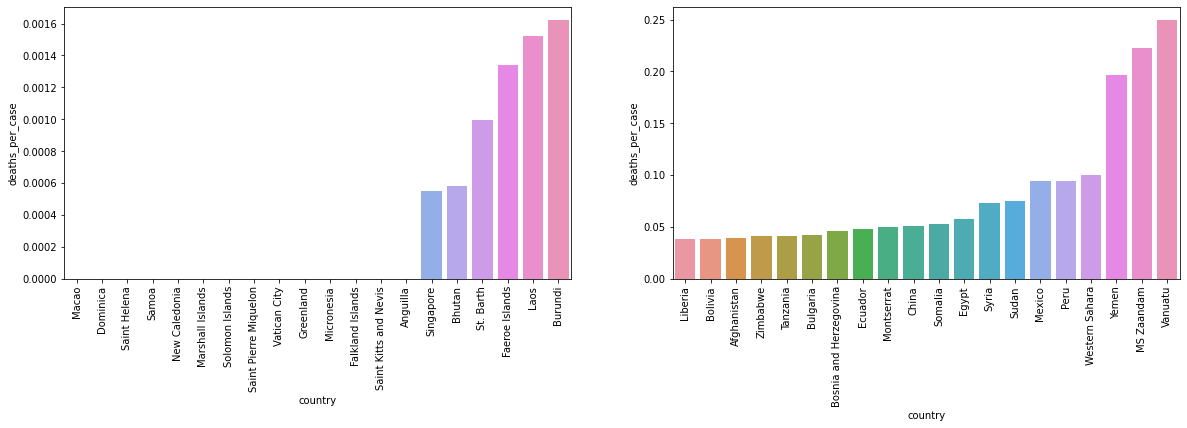

In [41]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.barplot(data=df.sort_values('deaths_per_case')[:20], x='country', y='deaths_per_case')
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.barplot(data=df.sort_values('deaths_per_case')[-20:], x='country', y='deaths_per_case')
plt.xticks(rotation=90);